In [29]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from raman_lib.spectra_scoring import score_sort_spectra, score_names
from raman_lib.misc import load_data
from raman_lib.visualization import plot_spectra_peaks, boxplot_comparison
from raman_lib.preprocessing import RangeLimiter, BaselineCorrector

In [57]:
# Paths where the data is stored
paths = [
    r"/proj/raman/bernadette_rebekka/out/10 mW",
    r"/proj/raman/bernadette_rebekka/out/25 mW",
    r"/proj/raman/bernadette_rebekka/out/data/B",
    r"/proj/raman/bernadette_rebekka/out/data/D"
]

names = ["10mW", "25mW", "B", "D"]

# Spectral range to analyze
# Use 'None' to use the whole range'
wn_min = 500
wn_max = 1650

# Window size for the Savitzky-Golay-Filter. Higher means stronger smoothing and less peaks found
sg_window = 50

# Threshold for the derivative. Higher means less peaks found.
threshold = 0.001

# Minimum height a peak must have to be detected
min_height = 50

# Plot baseline corrected (False) or raw spectra (True)
plot_raw = True

In [52]:
scores = []


for path in paths:
    print(path)
    # Load spectra from path
    data = load_data(path)
    # Run QC
    _, _, score_dict = score_sort_spectra(data, 
                                          n=1000,
                                          limits=(wn_min, wn_max), 
                                          sg_window=sg_window, 
                                          threshold=threshold, 
                                          min_height=min_height,
                                          score_measure=1,
                                          n_peaks_influence=2,
                                          detailed=True)

    scores.append(score_dict['total_scores'])
    
    
    

/proj/raman/bernadette_rebekka/out/10 mW
Analyzed 110 spectra in 1.86 seconds.
Mean Score: 40646

1st Quartile: 11629
Median Score: 25512
3rd Quartile: 48081

Min Score: 1659
Max Score: 281095
/proj/raman/bernadette_rebekka/out/25 mW
Analyzed 110 spectra in 1.75 seconds.
Mean Score: 181161

1st Quartile: 21507
Median Score: 86857
3rd Quartile: 289665

Min Score: 1847
Max Score: 894949
/proj/raman/bernadette_rebekka/out/data/B
Analyzed 84 spectra in 1.48 seconds.
Mean Score: 133560

1st Quartile: 20659
Median Score: 42810
3rd Quartile: 156412

Min Score: 3054
Max Score: 894949
/proj/raman/bernadette_rebekka/out/data/D
Analyzed 84 spectra in 1.33 seconds.
Mean Score: 65137

1st Quartile: 9094
Median Score: 29685
3rd Quartile: 65784

Min Score: 1847
Max Score: 466290


In [58]:
scores_med = []

for group in scores:
    scores_med.append(np.median(group))

In [59]:
scores_med

[25512.31538790532, 86857.73754754054, 42810.88657848163, 29685.83885072794]

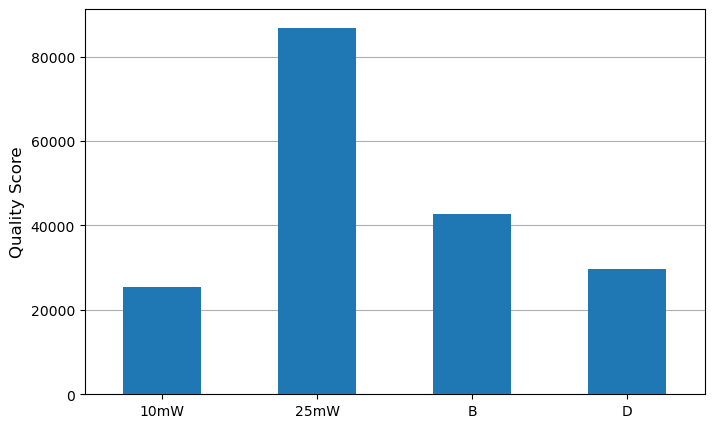

In [66]:
fig, ax = plt.subplots(figsize=(8,5))

pd.Series(scores_med, index=names).plot(kind="bar", rot=0, ax=ax, zorder=5)

ax.grid(axis="y")
ax.set_ylabel("Quality Score", fontsize=12)

fig.savefig("./qc_scores_rb.png", format="png", dpi=400, bbox_inches="tight")

In [61]:
pd.DataFrame([scores_med], columns=names)

,10mW,25mW,B,D
0,25512.315388,86857.737548,42810.886578,29685.838851


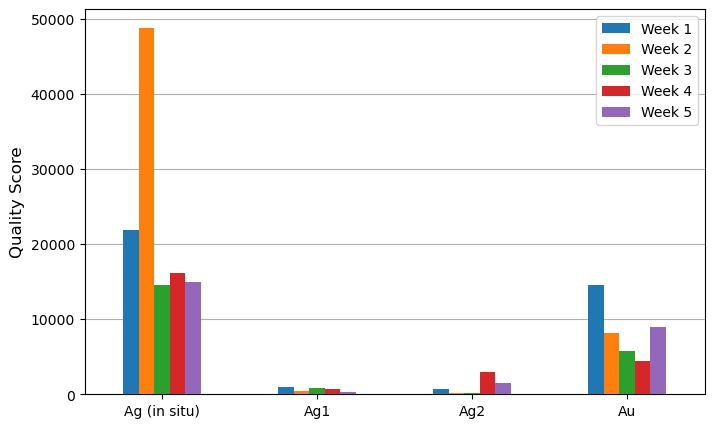

In [25]:
fig, ax = plt.subplots(figsize=(8,5))

pd.DataFrame(scores_med, columns=weeks_names, index=nanos_names).plot(kind="bar", ax=ax, rot=0, zorder=5)

ax.grid(axis="y")
ax.set_ylabel("Quality Score", fontsize=12)

fig.savefig("./qc_scores.png", format="png", dpi=400, bbox_inches="tight")

89